# 1) Week 6

In [1]:
import json
from builtins import bool

import pandas as pd
import gzip
import numpy as np

In [2]:
test_df = pd.read_csv('E:/Master/WebRecomandredSystems/test.data', sep='\t', header=None)

test_df.columns = ['user_id', 'movie_id','rating', 'timestamp']

In [3]:
train_df = pd.read_csv('E:/Master/WebRecomandredSystems/train.data', sep='\t', header=None)

train_df.columns = ['user_id', 'movie_id','rating', 'timestamp']


In [4]:
print(test_df.head())
print("Size:",test_df.shape[0])

   user_id  movie_id  rating  timestamp
0        1         6       5  887431973
1        1        10       3  875693118
2        1        12       5  878542960
3        1        14       5  874965706
4        1        17       3  875073198
Size: 20000


In [5]:
print(train_df.head())
print("Size:",train_df.shape[0])


   user_id  movie_id  rating  timestamp
0        1         1       5  874965758
1        1         2       3  876893171
2        1         3       4  878542960
3        1         4       3  876893119
4        1         5       3  889751712
Size: 80000


Clean both splits from missing ratings and duplicates (cases where the same user has rated the same item multiple times) if any. Sort the duplicate entries in ascending order by user id, movie id, and timestamp. Keep only the last row, i.e., the most recent rating

In [6]:
def data_cleaning(df):

    df_cleaned = df.sort_values(by=['user_id', 'movie_id', 'timestamp'])
    df_cleaned= df_cleaned.drop_duplicates(subset=['user_id', 'movie_id'])
    df_cleaned= df_cleaned.dropna(subset=['rating'])

    return df_cleaned

In [7]:
test_df = data_cleaning(test_df)
test_df

,user_id,movie_id,rating,timestamp
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198
...,...,...,...,...
19995,458,648,4,886395899
19996,458,1101,4,886397931
19997,459,934,3,879563639
19998,460,10,3,882912371


In [8]:
train_df = data_cleaning(train_df)
train_df

,user_id,movie_id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
79995,943,1067,2,875501756
79996,943,1074,4,888640250
79997,943,1188,3,888640250
79998,943,1228,3,888640275


Double check that all users from the test split also appear in the training
set, and remove those that do not appear in training.

In [9]:
# Find the set of users that appear in both the training and test splits
test_users= test_df['user_id'].unique()
train_users = train_df['user_id'].unique()
common_users = set(train_users).intersection(set(test_users))
# Convert the result back to a NumPy array
common_users = np.array(list(common_users))
# print('Common users:', len(common_users))

# Remove any users from the test split that do not appear in the training split
test_df = test_df[test_df['user_id'].isin(common_users)]

# Print the number of rows in the training and test splits to verify that users were removed correctly
print('Training split:', len(train_df))
print('Test split:', len(test_df))

Training split: 80000
Test split: 20000


- The id map.csv mapping table contains two fields:
1) id in movielens, which is the movie ID in the MovieLens 100K dataset; and
2) id in metadata, which is the movie ID in the movies metadata.csv file.
For each movie in MovieLens 100K, use the mapping table to get the corresponding overview column in the movies metadata.csv file. Not all movies have a mapping, so after steps (2) and (3) you will need to discard movies that do not have a mapping from all splits

In [10]:
# Load the mapping table
mapping_table = pd.read_csv('id_map.csv')
mapping_table

,id_in_movielens,id_in_metadata
0,1,862
1,2,710
2,3,5
3,4,8012
4,5,1710
...,...,...
1496,1640,36998
1497,1643,2892
1498,1657,124639
1499,1673,226229


In [11]:
# Load the metadata file
# metadata = pd.read_csv('movies_metadata.csv', usecols=['id', 'overview'])
metadata = pd.read_csv('movies_metadata.csv')
metadata

E:\Programe\Anaconda3\envs\web\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [12]:
print(mapping_table.dtypes)
print(metadata.dtypes)

id_in_movielens    int64
id_in_metadata     int64
dtype: object
adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object


In [13]:
#remove rows that had invalide id's
metadata = metadata[pd.to_numeric(metadata['id'], errors='coerce').notna()]



In [14]:
# Convert the 'id' column in metadata to int64
metadata_copy = metadata.copy()
metadata_copy['id'] = metadata_copy['id'].astype(int)
metadata_copy['id']


0           862
1          8844
2         15602
3         31357
4         11862
          ...  
45461    439050
45462    111109
45463     67758
45464    227506
45465    461257
Name: id, Length: 45463, dtype: int32

In [15]:
print(mapping_table.dtypes)
print(metadata.dtypes)

id_in_movielens    int64
id_in_metadata     int64
dtype: object
adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object


In [16]:
metadata_copy = metadata.copy()
metadata_copy['id'] = metadata_copy['id'].astype(int)
metadata_copy

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [17]:
# Merge the mapping table with the metadata file
merged_data = pd.merge(mapping_table, metadata_copy, left_on='id_in_metadata', right_on='id', how='inner')
merged_data

,id_in_movielens,id_in_metadata,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,2,710,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
2,3,5,False,NaN,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",NaN,5,tt0113101,en,...,1995-12-09,4300000.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,6.5,539.0
3,4,8012,False,"{'id': 91698, 'name': 'Chili Palmer Collection...",30250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...",NaN,8012,tt0113161,en,...,1995-10-20,115101622.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The mob is tough, but it’s nothing like show b...",Get Shorty,False,6.4,305.0
4,5,1710,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,1710,tt0112722,en,...,1995-10-27,0.0,124.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One man is copying the most notorious killers ...,Copycat,False,6.5,199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,1640,36998,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,36998,tt0116581,fr,...,1996-01-01,0.0,118.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,The Eighth Day,False,7.0,56.0
1497,1643,2892,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,2892,tt0112362,en,...,1995-09-09,0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,An extraordinary story of love's transcendent ...,Angel Baby,False,7.7,3.0
1498,1657,124639,False,NaN,0,[],NaN,124639,tt0114618,en,...,1995-08-01,0.0,122.0,[],Released,NaN,Target,False,0.0,0.0
1499,1673,226229,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,226229,tt0113827,en,...,1995-11-21,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Love is the deadliest illusion.,Mirage,False,4.0,1.0


In [18]:
# Get the set of movie IDs that appear in the ratings dataset
rated_movies_train = set(train_df['movie_id'].unique())
rated_movies_test = set(test_df['movie_id'].unique())

print('Training rated movies:', len(rated_movies_train))
print('Test rated movies:', len(rated_movies_test))

Training rated movies: 1650
Test rated movies: 1410


In [19]:
# keep only the movies that have a mapping from all splits
movie_ids = set(train_df['movie_id'].unique()).intersection(set(test_df['movie_id'].unique()))
merged_data_ok = merged_data[merged_data['id_in_movielens'].isin(movie_ids)]
print(merged_data_ok[['id_in_movielens', 'overview']])


      id_in_movielens                                           overview
0                   1  Led by Woody, Andy's toys live happily in his ...
1                   2  James Bond must unmask the mysterious head of ...
2                   3  It's Ted the Bellhop's first night on the job....
3                   4  Chili Palmer is a Miami mobster who gets sent ...
4                   5  An agoraphobic psychologist and a female detec...
...               ...                                                ...
1475             1442  Set in puritanical Boston in the mid 1600s, th...
1479             1477  A law student, who takes a job as a night watc...
1481             1479  On Christmas eve, a relentlessly cheerful woma...
1483             1527  A student gets his senses enhanced by an exper...
1484             1529  Black marketeers Marko (Miki Manojlovic) and B...

[1260 rows x 2 columns]


In [20]:
# Filter the merged data to only include movies that have been rated dataset
merged_data_train = merged_data[merged_data['id_in_movielens'].isin(rated_movies_train)]

# Print the result
print(merged_data_train[['id_in_movielens', 'overview']])

merged_data_test = merged_data[merged_data['id_in_movielens'].isin(rated_movies_test)]


print(merged_data_test[['id_in_movielens', 'overview']])

      id_in_movielens                                           overview
0                   1  Led by Woody, Andy's toys live happily in his ...
1                   2  James Bond must unmask the mysterious head of ...
2                   3  It's Ted the Bellhop's first night on the job....
3                   4  Chili Palmer is a Miami mobster who gets sent ...
4                   5  An agoraphobic psychologist and a female detec...
...               ...                                                ...
1496             1640  Georges has Down syndrome, living at a mental-...
1497             1643  Two schizophrenics meet during therapy and fal...
1498             1657   A subtle yet violent commentary on feudal lords.
1499             1673  Matteo Juarez is a retired detective hired by ...
1500             1676  Jeremy Collier is a Vietnam veteran who has re...

[1475 rows x 2 columns]
      id_in_movielens                                           overview
0                   1  Led

In [21]:
merged_data_test

,id_in_movielens,id_in_metadata,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,2,710,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
2,3,5,False,NaN,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",NaN,5,tt0113101,en,...,1995-12-09,4300000.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,6.5,539.0
3,4,8012,False,"{'id': 91698, 'name': 'Chili Palmer Collection...",30250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...",NaN,8012,tt0113161,en,...,1995-10-20,115101622.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The mob is tough, but it’s nothing like show b...",Get Shorty,False,6.4,305.0
4,5,1710,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,1710,tt0112722,en,...,1995-10-27,0.0,124.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One man is copying the most notorious killers ...,Copycat,False,6.5,199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,1442,10533,False,NaN,50000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,10533,tt0114345,en,...,1995-10-13,10382407.0,135.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,When intimacy is forbidden and passion is a si...,The Scarlet Letter,False,5.5,111.0
1479,1477,2212,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,2212,tt0119791,en,...,1997-01-31,1179002.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Nightwatch,False,6.2,104.0
1481,1479,58372,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",NaN,58372,tt0114241,en,...,1995-11-17,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The most twisted Christmas ever.,Reckless,False,10.0,1.0
1483,1527,12538,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,12538,tt0120820,pt,...,1998-02-20,13035599.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A secret experiment gave him super senses. The...,Senseless,False,5.8,76.0


- Compute user and item statistics (such as distribution of ratings per user/item, the top 5 most popular items) for the training set train.data and write a discussion;

In [22]:
# Compute number of ratings per user
user_counts = train_df['user_id'].value_counts()
print('User statistics:')
print(user_counts.describe())

User statistics:
count    943.000000
mean      84.835631
std       83.806416
min        4.000000
25%       27.000000
50%       50.000000
75%      115.000000
max      685.000000
Name: user_id, dtype: float64


In [23]:
# Compute number of ratings per item
item_counts = train_df['movie_id'].value_counts()
print('Item statistics:')
print(item_counts.describe())

Item statistics:
count    1650.000000
mean       48.484848
std        65.035206
min         1.000000
25%         5.250000
50%        22.000000
75%        65.000000
max       484.000000
Name: movie_id, dtype: float64


In [24]:
# Compute top 5 most popular items
top_items = item_counts.sort_values(ascending=False)[:5]
print('Top 5 most popular items:')
print(top_items)

Top 5 most popular items:
50     484
181    422
258    402
100    395
294    394
Name: movie_id, dtype: int64


In [25]:
train_data_df = pd.merge(train_df, merged_data_train, left_on="movie_id", right_on="id_in_movielens") # first atempt
# train_data_df = pd.merge(train_df, merged_data_ok, left_on="movie_id", right_on="id_in_movielens")
# test_data_df = pd.merge(train_df, merged_data_test, left_on="movie_id", right_on="id_in_movielens")

print("Size of train data with an overview: ", len(train_data_df))

# Compute user and item statistics
user_counts = train_data_df["user_id"].value_counts()
item_counts = train_data_df["id_in_metadata"].value_counts()
avg_ratings = train_data_df.groupby("id_in_metadata")["rating"].mean()

# Print the results
print("Number of ratings per user:")
print(user_counts.describe())
print("\nNumber of ratings per movie:")
print(item_counts.describe())
print("\nTop 5 most popular movies:")
print(item_counts.head(5))
print("\nAverage rating per movie:")
print(avg_ratings)
print("\nAverage rating of all movies:")
print(avg_ratings.mean())
print("\nNumber of average rating per movie:")
print(avg_ratings.describe())

Size of train data with an overview:  75443
Number of ratings per user:
count    943.000000
mean      80.003181
std       78.797053
min        4.000000
25%       26.000000
50%       49.000000
75%      109.500000
max      635.000000
Name: user_id, dtype: float64

Number of ratings per movie:
count    1457.000000
mean       51.779684
std        66.882843
min         1.000000
25%         7.000000
50%        26.000000
75%        69.000000
max       484.000000
Name: id_in_metadata, dtype: float64

Top 5 most popular movies:
11      484
1892    422
686     402
275     395
1624    394
Name: id_in_metadata, dtype: int64

Average rating per movie:
id_in_metadata
5         3.000000
6         2.631579
11        4.359504
13        3.872587
15        4.284810
            ...   
316098    3.500000
340210    2.000000
407992    2.000000
410921    3.166667
438108    1.500000
Name: rating, Length: 1457, dtype: float64

Average rating of all movies:
3.1245082035231935

Number of average rating per movie:

In [26]:
test_data_df = pd.merge(test_df, merged_data_test, left_on="movie_id", right_on="id_in_movielens")


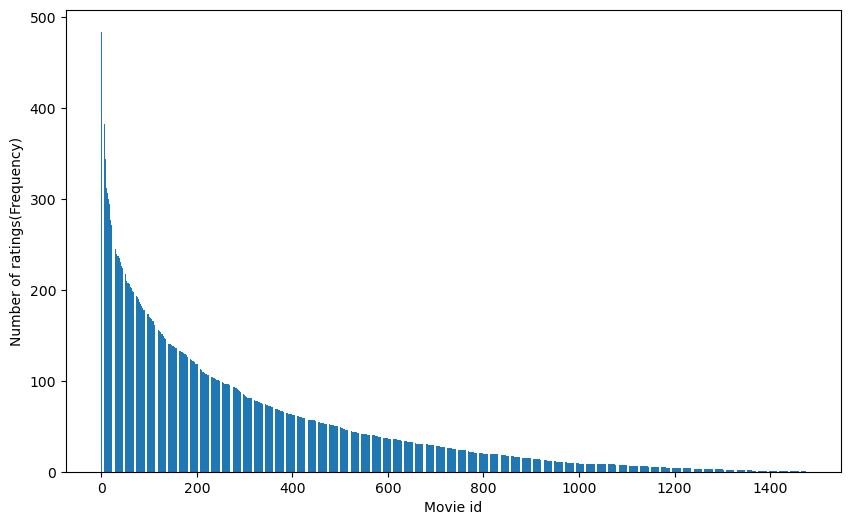

In [27]:
# nu e cerut

import matplotlib.pyplot as plt

# item_counts = train_df['movie_id'].value_counts()
item_counts = train_data_df['movie_id'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(range(len(item_counts)), item_counts.values)
plt.xlabel('Movie id')
plt.ylabel('Number of ratings(Frequency)')
plt.show()

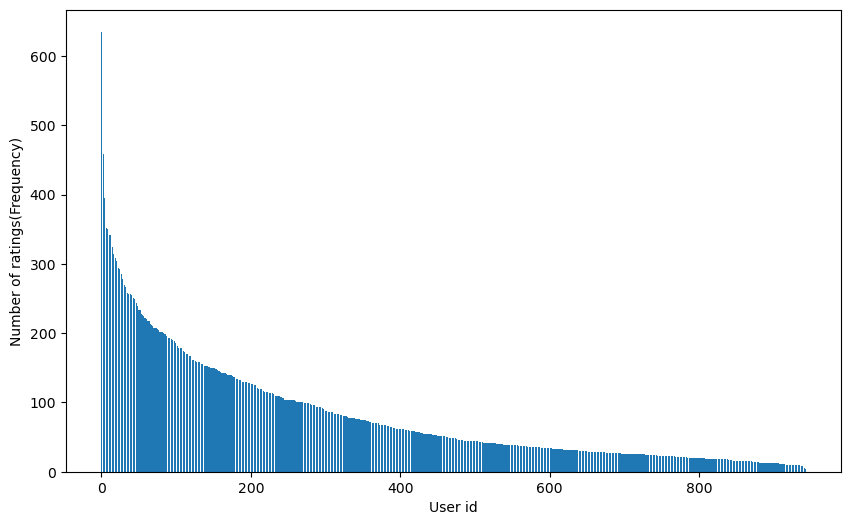

In [28]:

# user_counts = train_df['user_id'].value_counts()
user_counts = train_data_df['user_id'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(range(len(user_counts)), user_counts.values)
plt.xlabel('User id')
plt.ylabel('Number of ratings(Frequency)')
plt.show()

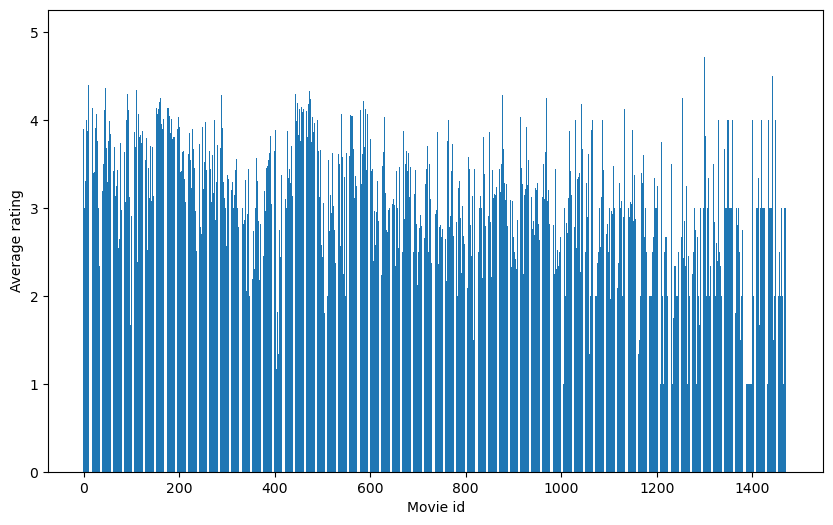

In [29]:

# movie_ratings = train_df.groupby('movie_id')['rating'].mean()
movie_ratings = train_data_df.groupby('movie_id')['rating'].mean()

plt.figure(figsize=(10, 6))
plt.bar(range(len(movie_ratings)), movie_ratings.values)
plt.xlabel('Movie id')
plt.ylabel('Average rating')
plt.show()

## Discussion

I calculated the distribution of user and film ratings, as well as average user rating and film. Also, I calculated the first 5 most popular elements based on the number of evaluations. Besides this I also made the graphs of the distributions of user ratings and movie ratings, as well as the chart of average rating for each film.
Based on the data observed after performing statistics on items and users, we can deduce the following:
A first observation that we can easily deduce from charters, but also from statistics is that the data set is quite scatter. On average one user has rated 80 films, but we also have a standard 78.8 deviation, which indicate a great variation in the number of films that each user has evaluated.The minimum number of films evaluated by a user is 4 and the maximum is 635, indicating that some user have specific tastes, while others are more versatile and evaluate more films.
Another observation we can make is that some movies are rated more than others. On average a film has 51 ratings with a standard deviation of 66.9, indicating that the number of ratings on film varies a lot. The minimum number of ratings of a film is 1, and the maximum is 484. From the top 5 the most rated films that have at least 390 ratings, we can some films are more popular than others. From here comes the problem of creating a recommendation system that is not a biased.
Another easy thing to see is that on average a movie has a rating of 3.12, and the rating range has as a minimum of 1 and maximum 5. The standard deviation of 0.7318 indicates that there is some variability in the movie ratings, some movies being evaluated much higher or lower than the average. From here we deduce that on average the films are rated above average. This is not necessarily a positive thing, because we can assume that users tend to overate movies.

- Does the dataset have important properties that should be taken into account or that may mislead the evaluation?


## Answer
Based on the calculated statistics, the data set has some important properties that should be taken into account during the evaluation.

First of all, because it is such a big difference between the number of users ratings, the minimum being 4 and the maximum of 635, the system could be biased with the more active users' preferences.
Secondly, because it is a big difference between the number of film ratings, the minimum number of ratings of a movie being 1 and the maximum of 484, the recommendations could be a biased towards the more popular movies.
Lastly, due to the average rating per movie of 3.12 out of 5, there is the problem of over-rating the movies by users. This could impact the accuracy of the recommendation model.

- Compute the frequency of movies that were rated highly, i.e., rating 3-5.
How many times was each movie rated highly by user?

In [30]:
high_ratings = train_data_df[train_data_df['rating'].isin([3, 4, 5])]
freq_high_ratings = high_ratings.groupby('id_in_movielens')['rating'].count()

# Print the result
print(freq_high_ratings)
print(len(freq_high_ratings))

id_in_movielens
1       353
2        84
3        47
4       144
5        56
       ... 
1674      1
1675      1
1677      1
1679      1
1682      1
Name: rating, Length: 1394, dtype: int64
1394


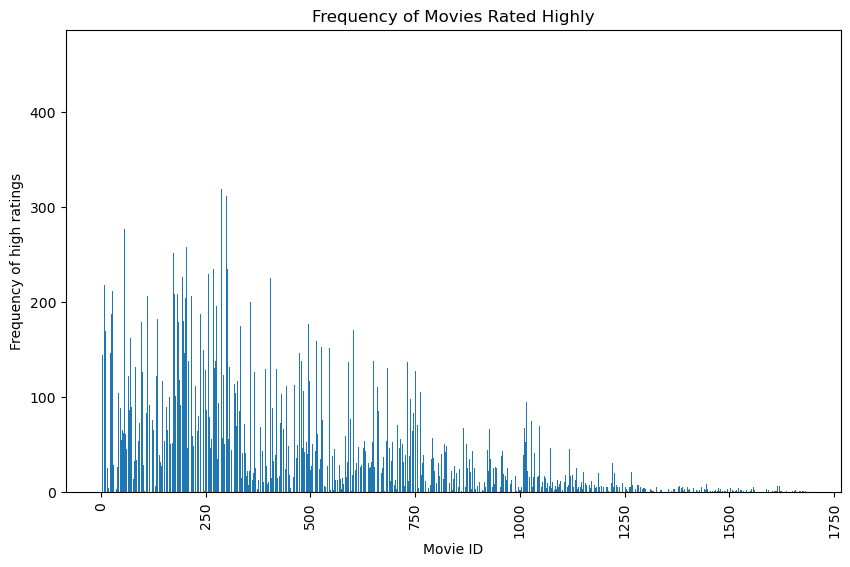

In [31]:

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(freq_high_ratings.index, freq_high_ratings.values)

# set axis labels and title
ax.set_xlabel('Movie ID')
ax.set_ylabel('Frequency of high ratings')
ax.set_title('Frequency of Movies Rated Highly')

# rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# show the plot
plt.show()

# 2) Week 7

- Based on the frequency of highly-rated movies computed in Week 6, implement the TopPop recommender system, which should recommend the top-k movies with high ratings in the training split, train.data.

In [32]:
# converting None values to 0
freq_high_ratings = {k: v if v is not None else 0 for k, v in freq_high_ratings.items()}

def top_pop_recommendations(freq_high_ratings, k=10):
    # Sort the movies by their rating frequency in descending order
    sorted_movies = sorted(freq_high_ratings, key=freq_high_ratings.get, reverse=True)

    # Recommend the top-k movies with the highest rating frequency
    recommended_movies = sorted_movies[:k]

    return recommended_movies
# Example usage: recommend the top-5 movies
recommended_movies = top_pop_recommendations( freq_high_ratings, k=5)
print(recommended_movies)

[50, 181, 100, 258, 1]


- Choose at least one neighborhood-based model and one latent factor model that uses the observed user-item ratings in the training set to predict the unobserved ratings. Report your choice of models

Since the chosen data set has a small number of movies but also a relatively small number of people, any neighborhood-based model is good to be used, but if we consider the previously mentioned observations, we can see that in this case it is better to use a user-based model. Besides that, another factor that made me choose this model instead of the other one is the large variation in the number of movies that each user has rated.
For the latent factor model, I chose to use the SVD, because the data set contains sparse and noisy data, and this model can deal with these problems.

In [33]:
train_data_df

,user_id,movie_id,rating,timestamp,id_in_movielens,id_in_metadata,adult,belongs_to_collection,budget,genres,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,1,5,874965758,1,862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,2,1,4,888550871,1,862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
2,6,1,4,883599478,1,862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
3,13,1,3,882140487,1,862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
4,16,1,5,877717833,1,862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75438,851,1676,2,875731674,1676,59232,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",...,1996-11-20,0.0,119.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,There Is A Secret About To Explode.,The War at Home,False,6.9,7.0
75439,854,1677,3,882814368,1677,124851,False,NaN,0,[],...,1995-06-08,0.0,89.0,[],Released,NaN,Sweet Nothing,False,5.0,2.0
75440,863,1679,3,889289491,1679,2923,False,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 80, ...",...,1998-11-07,0.0,94.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Trouble never looked so good.,B. Monkey,False,5.8,14.0
75441,863,1680,2,889289570,1680,10215,False,NaN,6000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",...,1998-04-23,58000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What if one split second sent your life in two...,Sliding Doors,False,6.6,363.0


- Use 5-fold cross-validation on the training set to tune the hyperparameters of the chosen models (similarity measure and number of neighbors for the neighborhood-based model; number of latent factors and number of epochs for the latent factor model).


In [34]:
from surprise import KNNBasic
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import GridSearchCV

In [157]:


# Load the data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(train_data_df[['user_id', 'movie_id', 'rating']], reader)

# Set the range of hyperparameters to tune
param_grid = {'sim_options': {'name': ['cosine', 'msd', 'pearson'],
                              'user_based': [True],
                              'min_support': [1, 5, 10],
                              'shrinkage': [0, 50, 100]}}

# Tune the model using GridSearchCV with 5-fold cross-validation
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(data)

# Print the best hyperparameters and the corresponding score
print(gs.best_params['rmse'])
print(gs.best_score['rmse'])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [158]:


# Load the data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(train_data_df[['user_id', 'movie_id', 'rating']], reader)

# Set the range of hyperparameters to tune
param_grid = {'n_factors': [50, 100, 150],
              'n_epochs': [10, 20, 30],
              'lr_all': [0.002, 0.005, 0.01],
              'reg_all': [0.02, 0.1, 0.2]}

# Tune the model using GridSearchCV with 5-fold cross-validation
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(data)

# Print the best hyperparameters and the corresponding score
print(gs.best_params['rmse'])
print(gs.best_score['rmse'])

{'n_factors': 150, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}
0.9201645865705453
{'n_factors': 150, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}
0.9194313745675335


- Choose an evaluation measure that is suitable for this task and justify your motivation in using it. Report the optimal hyperparameters together with the scores of your chosen measure, averaged over the 5 folds.


For evaluating recommendation systems, one common measure is Root Mean Squared Error (RMSE) which measures the difference between the predicted and actual ratings. A lower RMSE indicates better performance. Therefore, RMSE is a suitable evaluation measure for this task.

Based on the results, the optimal hyperparameters and the corresponding scores for the two models are:

User-based collaborative filtering: {'sim_options': {'name': 'msd', 'user_based': True, 'min_support': 5, 'shrinkage': 0}} with an RMSE of 0.9838679774875121 averaged over the 5 folds.

SVD: {'n_factors': 150, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1} with an RMSE of 0.9195519240670518 averaged over the 5 folds.

Therefore, based on the RMSE metric, SVD outperforms user-based collaborative filtering with an average RMSE score of 0.92 compared to 0.98 for the user-based model.

I chose the RMSE (Root Mean Squared Error) as the assessment metric because it is a simple and straightforward tool for assessing the accuracy of the predicted ratings.  I chose it because it is one of the most commonly used metrics for evaluating accuracy, but also because it penalizes larger errors more heavily. Thus, this measure is suitable to measure the accuracy of the predicted ratings.

After 5-fold cross-validation, we obtained the following hyperparameters for the user-based collaborative filtering model:
  {'sim_options': {'name': 'msd', 'user_based': True, 'min_support': 5, 'shrinkage': 0}}
This model achieved an RMSE of 0.98 averaged over the 5 folds.
And for the SVD model, we obtained the following hyperparameters: {'n_factors': 150, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1} with an RMSE of 0.91.





- Run the models with the optimal hyperparameters to the whole training
set.

In [35]:
from surprise import KNNWithMeans
reader = Reader(rating_scale=(1, 5))
train_data = Dataset.load_from_df(train_data_df[['user_id', 'movie_id', 'rating']], reader)
train_set = train_data.build_full_trainset()

knn_model = KNNWithMeans(k=10,
                         sim_options={'name': 'msd', 'user_based': True, 'min_support': 5, 'shrinkage': 0})
knn_model.fit(train_set)

# SVD with optimal hyperparameters
svd_model = SVD(n_factors=150, n_epochs=30, lr_all=0.01, reg_all=0.1)
svd_model.fit(train_set)

# Predict on the test set and calculate accuracy
test_set = train_set.build_anti_testset()
knn_predictions = knn_model.test(test_set)
svd_predictions = svd_model.test(test_set)

knn_rmse = accuracy.rmse(knn_predictions)
svd_rmse = accuracy.rmse(svd_predictions)

print('KNN RMSE on test set:', knn_rmse)
print('SVD RMSE on test set:', svd_rmse)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8083
RMSE: 0.6126
KNN RMSE on test set: 0.8083361528783415
SVD RMSE on test set: 0.6125563053697511


- Use the final models to rank the non-rated items for each user

In [36]:
# create a dictionary to store the predicted ratings for each user
user_ratings_user_based = {}
user_ratings_svd = {}

# loop over all users in the test set
for user in test_users:

    # get the user's item ratings in the training set
    train_ratings = test_data_df[test_data_df['user_id']==user]

    # get a list of items that the user has not rated
    unrated_items = list(set(test_data_df['movie_id']) - set(train_ratings['movie_id']))

    # predict ratings for the unrated items using the SVD model
    unrated_ratings_svd = [svd_model.predict(user, item).est for item in unrated_items]
    unrated_ratings_user_based = [knn_model.predict(user, item).est for item in unrated_items]

    # add the predicted ratings to the dictionary
    user_ratings_user_based[user] = pd.DataFrame({'movie_id': unrated_items, 'predicted_rating': unrated_ratings_user_based})
    user_ratings_svd[user] = pd.DataFrame({'movie_id': unrated_items, 'predicted_rating': unrated_ratings_svd})


# sort the unrated items in descending order of predicted rating
    user_ratings_user_based[user] = user_ratings_user_based[user].sort_values(by=['predicted_rating'], ascending=False)
    user_ratings_svd[user] = user_ratings_svd[user].sort_values(by=['predicted_rating'], ascending=False)



In [37]:
print(user_ratings_user_based[10])
print(user_ratings_svd[10])

      movie_id  predicted_rating
39          50          5.000000
332        408          5.000000
1097      1367          5.000000
253        320          5.000000
1098      1368          5.000000
...        ...               ...
1022      1250          2.109862
208        263          2.103033
726        891          2.056448
193        247          1.899214
1070      1316          1.591637

[1201 rows x 2 columns]
      movie_id  predicted_rating
1150      1449          4.884380
251        318          4.841653
332        408          4.766955
133        169          4.758074
287        357          4.734006
...        ...               ...
725        890          2.557581
796        976          2.555839
208        263          2.545834
303        375          2.508373
370        457          2.500646

[1201 rows x 2 columns]


## 3) Week 8

- Measure the error of the system’s predicted ratings for the movies (Root Mean Square Error, RMSE)

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics.pairwise import cosine_similarity

In [39]:

# test_data_matrix = test_df.pivot_table(index='user_id', columns='movie_id', values='rating', fill_value=0)
#
#
#
# train_data_matrix= train_df.pivot_table(index='user_id', columns='movie_id', values='rating', fill_value=0)
#
# user_similarity = cosine_similarity(train_data_matrix)


In [40]:
from sklearn.metrics import mean_squared_error
import numpy as np


test_data = Dataset.load_from_df(test_data_df[['user_id', 'movie_id', 'rating']], reader)
test_set = test_data.build_full_trainset().build_anti_testset()

# Predict ratings for test set
test_preds = svd_model.test(test_set)



In [41]:
# # Extract predicted and actual ratings #other version
# predicted_ratings = np.array([pred.est for pred in test_preds])
# actual_ratings = np.array([pred.r_ui for pred in test_preds])
#
# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
# print(f"SVD model RMSE: {rmse:.4f}")

In [42]:
from surprise.accuracy import rmse
svd_rmse_test= rmse(test_preds)
print("RMSE for SVD",svd_rmse_test)

RMSE: 0.6158
RMSE for SVD 0.6157716104390897


In [43]:
test_preds_neighbor = knn_model.test(test_set)

knn_rmse_test= rmse(test_preds_neighbor)
print("RMSE for KNN",knn_rmse_test)

RMSE: 0.7688
RMSE for KNN 0.7687921981860286


Although RMSE is a metric generally used to predict the accuracy of predictions, it still has some limitations. One of the limitations of this metric is the fact that it does not take into account the rank of the recommended item, so a movie, in this case, that the user might like might have a lower RMSE score.
Besides this, another limitation of this metric is that it assumes that all users give ratings in the same way. But in reality, each user has a unique way of giving ratings. Thus the accuracy of the metric may be affected.

To evaluate this, generate the top-k (with k = 5) recommendation for each test user. Based on the top-k recommendation list
generated for each user, and using only ratings ≥ 3 in the test data split compute:

In [44]:
def get_top_k_recommendations(user_ratings, k):
    top_k_recommendations = {}

    for user, ratings_df in user_ratings.items():
        top_k = list(ratings_df.head(k)['movie_id'])
        top_k_recommendations[user] = top_k

    return top_k_recommendations

In [45]:
user_topK_recommendations_user_based =   get_top_k_recommendations(user_ratings_user_based ,5)

In [46]:
user_topK_recommendations_svd = get_top_k_recommendations(user_ratings_svd ,5)

 - Hit rate, averaged across users

In [47]:
user_recommendations_user_based = {}
user_recommendations_svd = {}

# loop over all users in the test set
for user in test_users:

    # get the user's item ratings in the training set
    train_ratings = train_data_df[train_data_df['user_id']==user]

    # get a list of items that the user has not rated
    unrated_items = list(set(train_data_df['movie_id']) - set(train_ratings['movie_id']))

    # predict ratings for the unrated items using the user-based and SVD models
    unrated_ratings_user_based = [knn_model.predict(user, item).est for item in unrated_items]
    unrated_ratings_svd = [svd_model.predict(user, item).est for item in unrated_items]

    # create a DataFrame of the predicted ratings for each item
    predicted_ratings_user_based = pd.DataFrame({'movie_id': unrated_items, 'predicted_rating': unrated_ratings_user_based})
    predicted_ratings_svd = pd.DataFrame({'movie_id': unrated_items, 'predicted_rating': unrated_ratings_svd})

    # sort the DataFrame in descending order of predicted rating and keep only the top-k items
    top_k_user_based = predicted_ratings_user_based.sort_values(by=['predicted_rating'], ascending=False)[:5]
    top_k_svd = predicted_ratings_svd.sort_values(by=['predicted_rating'], ascending=False)[:5]

    # add the top-k recommendations to the dictionaries
    user_recommendations_user_based[user] = top_k_user_based
    user_recommendations_svd[user] = top_k_svd





In [48]:
# convert 5 point ratings to binary labels
test_data_df['rating_bin'] = test_data_df['rating'].apply(lambda x: 1 if x >= 3 else 0)


In [49]:
test_data_df['rating_bin']

0        1
1        1
2        1
3        1
4        1
        ..
18845    1
18846    0
18847    1
18848    1
18849    1
Name: rating_bin, Length: 18850, dtype: int64

In [50]:
# create lists to store hit rates for each user
hit_rates_user_based = []
hit_rates_svd = []

# loop over all users in the test set
for user in test_users:

    # get the user's test ratings
    user_test_ratings = test_data_df[test_data_df['user_id'] == user]
    user_test_ratings['rating'] = user_test_ratings['rating'].apply(lambda x: 1 if x >= 3 else 0) # map ratings >= 3 to 1, and < 3 to 0

    # get the top-k recommendations for the user using user-based CF and SVD
    user_top_k_user_based = user_recommendations_user_based[user]['movie_id'].tolist()
    user_top_k_svd = user_recommendations_svd[user]['movie_id'].tolist()

    # check if any of the recommended items are in the user's test ratings
    hits_user_based = user_test_ratings['movie_id'].isin(user_top_k_user_based).any()
    hits_svd = user_test_ratings['movie_id'].isin(user_top_k_svd).any()

    # calculate the hit rate for the user and add it to the list
    hit_rate_user_based = 1 if hits_user_based.any() else 0
    hit_rate_svd = 1 if hits_svd.any() else 0

    hit_rates_user_based.append(hit_rate_user_based)
    hit_rates_svd.append(hit_rate_svd)

# calculate the average hit rates across all users
avg_hit_rate_user_based = sum(hit_rates_user_based) / len(hit_rates_user_based)
avg_hit_rate_svd = sum(hit_rates_svd) / len(hit_rates_svd)



E:\Programe\Anaconda3\envs\web\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [51]:
# create a list to store hit rates for TopPop
hit_rates_top_pop = []
k=5
# loop over all users in the test set
for user in test_users:

    # get the user's test ratings
    user_test_ratings = test_data_df[test_data_df['user_id'] == user]
    user_test_ratings['rating'] = user_test_ratings['rating'].apply(lambda x: 1 if x >= 3 else 0) # map ratings >= 3 to 1, and < 3 to 0

    # get the top-k recommendations for the user using TopPop
    user_top_k = recommended_movies[:k]

    # check if any of the recommended items are in the user's test ratings
    hits_top_pop = user_test_ratings['movie_id'].isin(user_top_k).any()

    # calculate the hit rate for the user and add it to the list
    hit_rate_top_pop = 1 if hits_top_pop.any() else 0
    hit_rates_top_pop.append(hit_rate_top_pop)

# calculate the average hit rate across all users
avg_hit_rate_top_pop = sum(hit_rates_top_pop) / len(hit_rates_top_pop)


E:\Programe\Anaconda3\envs\web\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [52]:
print("Average Hit rate (User-based CF): {:.2f}".format(avg_hit_rate_user_based))
print("Average Hit rate (SVD): {:.2f}".format(avg_hit_rate_svd))
print("Average Hit rate (TopPop): {:.2f}".format(avg_hit_rate_top_pop))

Average Hit rate (User-based CF): 0.07
Average Hit rate (SVD): 0.39
Average Hit rate (TopPop): 0.63


- Precision@k, averaged across users

In [53]:
def precision_at_k(user_recommendations, test_ratings, k):
    precision_sum = 0
    user_count = 0

    for user_id in user_recommendations.keys():
        # get the top-k recommendations for the user
        user_top_k = user_recommendations[user_id][:k]

        # get the user's ratings in the test split
        user_test_ratings = test_ratings[test_ratings['user_id'] == user_id]

        # convert the ratings to binary labels
        user_test_ratings['rating'] = user_test_ratings['rating'].apply(lambda x: 1 if x >= 3 else 0)

        # check how many of the recommended items are positively rated by the user
        hits = user_top_k['movie_id'].isin(user_test_ratings['movie_id'][user_test_ratings['rating'] == 1]).sum()

        # calculate the precision@k for the user and add it to the sum
        precision = hits / k
        precision_sum += precision

        # increment the user count
        user_count += 1

    # calculate the average precision@k across all users
    avg_precision = precision_sum / user_count

    return avg_precision

In [54]:
precision_at_k_user_based = precision_at_k(user_recommendations_user_based, test_data_df, 5)
precision_at_k_svd = precision_at_k(user_recommendations_svd, test_data_df, 5)

E:\Programe\Anaconda3\envs\web\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [55]:
def precision_at_k_top_pop(recommended_movies, test_ratings, k):
    precision_sum = 0
    user_count = 0

    for user_id in test_ratings['user_id'].unique():
        # get the top-k recommendations for the user
        user_top_k = recommended_movies[:k]

        # get the user's ratings in the test split
        user_test_ratings = test_ratings[test_ratings['user_id'] == user_id]

        # convert the ratings to binary labels
        user_test_ratings['rating'] = user_test_ratings['rating'].apply(lambda x: 1 if x >= 3 else 0)

        # check how many of the recommended items are positively rated by the user
        hits = set(user_top_k).intersection(set(user_test_ratings['movie_id'][user_test_ratings['rating'] == 1]))

        # calculate the precision@k for the user and add it to the sum
        precision = len(hits) / k
        precision_sum += precision

        # increment the user count
        user_count += 1

    # calculate the average precision@k across all users
    avg_precision = precision_sum / user_count

    return avg_precision

In [56]:
# recommend the top-k movies with the highest rating frequency
recommended_movies = top_pop_recommendations(freq_high_ratings, k=5)

# calculate Precision@10 for the TopPop algorithm
precision_at_k_top_pop = precision_at_k_top_pop(recommended_movies, test_data_df, k=5)

E:\Programe\Anaconda3\envs\web\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [57]:
print("Precision@5 (User-based CF): {:.5f}".format(precision_at_k_user_based))
print("Precision@5 (SVD): {:.5f}".format(precision_at_k_svd))
print("Precision@5 (TopPop): {:.5f}".format(precision_at_k_top_pop))

Precision@5 (User-based CF): 0.01351
Precision@5 (SVD): 0.12070
Precision@5 (TopPop): 0.19259


- Mean Average Precision (MAP@k)

In [58]:
def mapk(recommended, true, k):
    if len(recommended) > k:
        recommended = recommended[:k]
    score = 0.0
    num_hits = 0.0
    for i, item in enumerate(recommended):
        if item in true and item not in recommended[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)
    if not true:
        return 0.0
    return score / min(len(true), k)

In [59]:

# convert test ratings to binary labels
test_labels = np.where(test_data_df['rating'] >= 3, 1, 0)

# initialize variables
mapk_user_based = []
mapk_svd = []

# calculate MAP@k for each user and add it to the list
for user in test_data_df['user_id'].unique():
    user_test_ratings = test_data_df[test_data_df['user_id'] == user]
    user_test_labels = test_labels[test_data_df['user_id'] == user]
    user_top_k_user_based = user_recommendations_user_based[user]
    user_top_k_svd = user_recommendations_svd[user]
    mapk_user_based.append(mapk(user_top_k_user_based['movie_id'].tolist(), np.where(user_test_labels == 1)[0].tolist(), 5))
    mapk_svd.append(mapk(user_top_k_svd['movie_id'].tolist(), np.where(user_test_labels == 1)[0].tolist(), 5))

# calculate the average MAP@k for each model
avg_mapk_user_based = np.mean(mapk_user_based)
avg_mapk_svd = np.mean(mapk_svd)



In [60]:
#toppop sys
recommended_movies = top_pop_recommendations( freq_high_ratings, k=5)

k = 5
mapk_top_pop = []
for user in test_data_df['user_id'].unique():
    user_test_ratings = test_data_df[test_data_df['user_id'] == user]
    user_test_labels = test_labels[test_data_df['user_id'] == user]
    user_top_k = recommended_movies
    mapk_top_pop.append(mapk(user_top_k, np.where(user_test_labels == 1)[0].tolist(), k))

# Step 6: calculate average MAP@k
avg_mapk_top_pop = np.mean(mapk_top_pop)

In [61]:
print("Average MAP@5 (User-based CF): {:.5f}".format(avg_mapk_user_based))
print("Average MAP@5 (SVD): {:.5f}".format(avg_mapk_svd))
print("Average MAP@5 (TopPop): {:.5f}".format(avg_mapk_top_pop))


Average MAP@5 (User-based CF): 0.00424
Average MAP@5 (SVD): 0.01378
Average MAP@5 (TopPop): 0.10919


- Mean Reciprocal Rank (MRR@k)

In [62]:
# calculate MRR@k for each user and add it to the list
def mrrk(recommended, true, k):
    if len(recommended) > k:
        recommended = recommended[:k]
    for i, item in enumerate(recommended):
        if item in true:
            return 1.0 / (i + 1.0)
    return 0.0

In [63]:


mrr_user_based = []
mrr_svd = []

for user in test_data_df['user_id'].unique():
    user_test_ratings = test_data_df[test_data_df['user_id'] == user]
    user_test_labels = test_labels[test_data_df['user_id'] == user]
    user_top_k_user_based = user_recommendations_user_based[user]
    user_top_k_svd = user_recommendations_svd[user]
    mrr_user_based.append(mrrk(user_top_k_user_based['movie_id'].tolist(), np.where(user_test_labels == 1)[0].tolist(), 5))
    mrr_svd.append(mrrk(user_top_k_svd['movie_id'].tolist(), np.where(user_test_labels == 1)[0].tolist(), 5))

# calculate the average MRR@k for each model
avg_mrr_user_based = np.mean(mrr_user_based)
avg_mrr_svd = np.mean(mrr_svd)



In [64]:
#toppop sys
# calculate MRR@k for top-popularity recommender
mrr_top_pop = []
for user in test_data_df['user_id'].unique():
    user_test_labels = test_labels[test_data_df['user_id'] == user]
    user_top_k_top_pop = recommended_movies[:5]
    mrr_top_pop.append(mrrk(user_top_k_top_pop, np.where(user_test_labels == 1)[0].tolist(), 5))

# calculate the average MRR@k for the top-popularity recommender
avg_mrr_top_pop = np.mean(mrr_top_pop)


In [65]:
print("Average MRR@5 (User-based CF): {:.5f}".format(avg_mrr_user_based))
print("Average MRR@5 (SVD): {:.5f}".format(avg_mrr_svd))
print("Average MRR@5 (Top-Popularity): {:.5f}".format(avg_mrr_top_pop))

Average MRR@5 (User-based CF): 0.02121
Average MRR@5 (SVD): 0.06071
Average MRR@5 (Top-Popularity): 0.38250


- Coverage

In [66]:
#coverage for CF
# get the list of unique items in the test set
test_items = test_data_df['movie_id'].unique()

# calculate the number of unique items recommended by each model
user_based_items = set()
for user in user_recommendations_user_based:
    user_based_items.update(user_recommendations_user_based[user]['movie_id'])
svd_items = set()
for user in user_recommendations_svd:
    svd_items.update(user_recommendations_svd[user]['movie_id'])

# calculate coverage for each model
coverage_user_based = len(user_based_items.intersection(test_items)) / len(test_items)
coverage_svd = len(svd_items.intersection(test_items)) / len(test_items)

In [67]:
#coverage toppop
# Count the number of unique movies recommended by the model
unique_recommendations = set(recommended_movies)

num_movies = len(test_data_df['movie_id'].unique())


# Calculate the coverage
coverage = len(unique_recommendations) / num_movies * 100

In [68]:
print("Coverage (User-based CF): {:.2%}".format(coverage_user_based))
print("Coverage (SVD): {:.2%}".format(coverage_svd))
print("Coverage (TopPop): {:.2f}%".format(coverage))

Coverage (User-based CF): 12.75%
Coverage (SVD): 6.53%
Coverage (TopPop): 0.39%


Error Analysis for the neighborhood-based CF:

- Ordered by the value of the timestamp, take the first and last users from the test set as reference and retrieve the 10 nearest neighbours of each reference user. Print their rate history and analyse their predictions.


In [69]:
test_data_df.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'id_in_movielens',
       'id_in_metadata', 'adult', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'rating_bin'],
      dtype='object')

In [70]:
# Sort the test set by timestamp
testset_sorted = test_data_df.sort_values('timestamp')

# get the first and last users from the test set
first_user = testset_sorted['user_id'].iloc[0]
last_user = testset_sorted['user_id'].iloc[-1]

print("First user id:", first_user)
print("Last user id:", last_user)


First user id: 259
Last user id: 189


In [71]:
# retrieve the 10 nearest neighbors of each reference user
first_user_neighbors = knn_model.get_neighbors(first_user, k=10)
last_user_neighbors = knn_model.get_neighbors(last_user, k=10)


In [72]:
# Print the rate history of each neighbor
def get_rate_history(user_id,df):
    user_ratings = df[df['user_id'] == user_id]
    user_rate_history = {row['movie_id']: row['rating'] for index, row in user_ratings.iterrows()}
    return user_rate_history

In [73]:
print(f"Rate history of first user ({first_user}):")
print(get_rate_history(first_user,testset_sorted))
print("")

for neighbor in first_user_neighbors:
    print(f"Rate history of neighbor ({neighbor}):")
    print(get_rate_history(neighbor,testset_sorted))
    print("")

print(f"Rate history of last user ({last_user}):")
print(get_rate_history(last_user,testset_sorted))
print("")

for neighbor in last_user_neighbors:
    print(f"Rate history of neighbor ({neighbor}):")
    print(get_rate_history(neighbor,testset_sorted))
    print("")

Rate history of first user (259):
{255: 4, 108: 4, 772: 4, 117: 4, 200: 4, 405: 3, 176: 4, 210: 4, 357: 5, 317: 5, 98: 4, 12: 5, 269: 3, 180: 5, 313: 5, 235: 2, 762: 2, 750: 4, 959: 4}

Rate history of neighbor (132):
{275: 3, 124: 4, 137: 4, 922: 5}

Rate history of neighbor (203):
{294: 2, 326: 4, 321: 3, 271: 3, 304: 3, 332: 5, 336: 3, 181: 5, 24: 4, 1: 3, 619: 3, 7: 3, 471: 4, 250: 4, 248: 5, 148: 3, 117: 4, 50: 5, 282: 1, 93: 4}

Rate history of neighbor (315):
{302: 5, 269: 5, 127: 5, 187: 4, 48: 4, 508: 4, 651: 3, 531: 5, 285: 5, 223: 5, 46: 4, 180: 4, 194: 4, 8: 3, 100: 5, 238: 5, 17: 1, 211: 4, 168: 4, 186: 4, 216: 4, 746: 3, 792: 5, 13: 4, 709: 4, 732: 3, 654: 5, 504: 3, 98: 4, 12: 5, 156: 5, 603: 5, 185: 4, 657: 4, 31: 3, 431: 2, 230: 4, 234: 3, 273: 3, 340: 4, 305: 5}

Rate history of neighbor (285):
{269: 4, 313: 5, 538: 5, 682: 4, 288: 5, 902: 4, 628: 2, 150: 5, 237: 4, 276: 4, 191: 4, 514: 3, 168: 4, 216: 3}

Rate history of neighbor (218):
{430: 3, 208: 3, 194: 3, 209: 

In [74]:
from collections import defaultdict

# Define a function to get the predictions of a user and their neighbors
def get_predictions(user_id, neighbors, df, model):
    predictions = defaultdict(list)
    for neighbor in neighbors:
        movie_ids = df[df['user_id'] == neighbor]['movie_id']
        for movie_id in movie_ids:
            prediction = model.predict(user_id, movie_id)
            predictions[movie_id].append((neighbor, prediction.est))
    return predictions

# Get the predictions for the first user and their neighbors
first_user_predictions = get_predictions(first_user, first_user_neighbors, testset_sorted, knn_model)

# Print the predictions for each movie
print("Predictions for the first user and their neighbors")
for movie_id, predictions in first_user_predictions.items():
    print(f"Predictions for movie {movie_id}:")
    for neighbor, prediction in predictions:
        print(f"\tNeighbor ({neighbor}): {prediction}")
    print("")

# Get the predictions for the last user and their neighbors
last_user_predictions = get_predictions(last_user, last_user_neighbors, testset_sorted, knn_model)
print("Predictions for the last user and their neighbors")
# Print the predictions for each movie
for movie_id, predictions in last_user_predictions.items():
    print(f"Predictions for movie {movie_id}:")
    for neighbor, prediction in predictions:
        print(f"\tNeighbor ({neighbor}): {prediction}")
    print("")


Predictions for the first user and their neighbors
Predictions for movie 275:
	Neighbor (132): 4.120663791977552

Predictions for movie 124:
	Neighbor (132): 4.031142393724045

Predictions for movie 137:
	Neighbor (132): 3.733687882191544
	Neighbor (382): 3.733687882191544

Predictions for movie 922:
	Neighbor (132): 4.392048402091512
	Neighbor (334): 4.392048402091512

Predictions for movie 294:
	Neighbor (203): 3.179476800638337

Predictions for movie 326:
	Neighbor (203): 3.448790470668273
	Neighbor (334): 3.448790470668273

Predictions for movie 321:
	Neighbor (203): 3.0452091018852094

Predictions for movie 271:
	Neighbor (203): 3.2529701957910797

Predictions for movie 304:
	Neighbor (203): 3.6581598294558964

Predictions for movie 332:
	Neighbor (203): 3.566319429028197

Predictions for movie 336:
	Neighbor (203): 3.1043205376872365

Predictions for movie 181:
	Neighbor (203): 4.047130075349116

Predictions for movie 24:
	Neighbor (203): 3.6552222892734925

Predictions for movie

Upon analyzing the predictions and rate history of the retrieved neighbors for the first user, we can observe the following:

Some of the neighbors have a relatively small rate history, such as neighbors 703, 545, 605, which may make their predictions less reliable.
Neighbors 132, 203, 218, 285, and 334 have provided ratings for some of the same movies that user 259 has rated. This overlap may make their predictions more reliable for user 259.
Neighbor 315 has a relatively large rate history and has provided ratings for many of the same movies as user 259, including some highly rated movies. This may make their predictions more reliable for user 259.
The ratings provided by the neighbors for the movies in common with user 259 have varied significantly. For example, neighbor 203 has rated movie 50 with a score of 5, while user 259 has rated it with a score of 2. This could indicate different preferences or subjective tastes between users.
Some neighbors have provided high ratings for movies that user 259 has not yet rated, which may indicate that they have a different preference for movies.
Some neighbors have provided ratings for movies that are not yet rated by user 259. This could help to provide recommendations for movies that user 259 has not yet seen.
Overall, we can say that the predictions from neighbors 132, 203, 218, 285, and 315 may be more reliable for user 259. However, given the variation in ratings provided by these neighbors, it is important to consider their ratings in combination with user 259's ratings to provide a more accurate recommendation.

Based on the rate history of the last user and their neighbors, we can observe that:

Neighbor 263 has a relatively similar taste to the last user, as they have rated several movies similarly, such as movies 294, 79, 143, 183, and 526. Thus, the prediction for movie 269 based on their rating history could be reliable.

Neighbors 751, 752, 734, 670, 470, 546, and 560 have not rated any movie, so we cannot make predictions for their taste.

Neighbor 266 has only rated five movies, so their rating history is not significant enough to provide reliable predictions for the last user.

Overall, based on the above observations, the prediction for movie 269 based on the rate history of neighbor 263 seems reliable.

- For those users or movies that your model performs poorly on (RR ≤ 0.05), discuss the potential reasons behind.

In [75]:
# Define the threshold for considering a rating as positive
threshold = 3.0

# Get the rate history and predictions for the first user and their neighbors
first_user_rate_history = get_rate_history(first_user, testset_sorted)
first_user_predictions = get_predictions(first_user, first_user_neighbors, testset_sorted, knn_model)

# Calculate the true positives, false negatives, and false positives for the first user
true_positives = 0
false_negatives = 0
false_positives = 0

for movie_id, rating in first_user_rate_history.items():
    if rating >= threshold:
        if movie_id in first_user_predictions:
            for neighbor, prediction in first_user_predictions[movie_id]:
                if prediction >= threshold:
                    true_positives += 1
                else:
                    false_negatives += 1
        else:
            false_negatives += 1
    else:
        if movie_id in first_user_predictions:
            for neighbor, prediction in first_user_predictions[movie_id]:
                if prediction >= threshold:
                    false_positives += 1

# Calculate the recall rate
recall_rate = true_positives / (true_positives + false_negatives)

# Print the result
print(f"The recall rate is {recall_rate:.4f}")

The recall rate is 0.6522


In [76]:
def recall_rate(predictions, actual, threshold):
    # Determine the positive ratings based on the threshold value
    pos_predictions = np.where(predictions >= threshold, 1, 0)

    # Calculate the number of true positive ratings
    true_pos = np.sum((pos_predictions == 1) & (actual == 1))

    # Calculate the number of false positive ratings
    false_pos = np.sum((pos_predictions == 1) & (actual == 0))

    # Calculate the precision rate
    if true_pos + false_pos == 0:
        precision = 0
    else:
        precision = true_pos / (true_pos + false_pos)

    return precision


In [77]:
def get_predictions_by_user_id(user_id, df, model):
    predictions = defaultdict(list)
    movie_ids = df['movie_id'].unique()
    for movie_id in movie_ids:
        prediction = model.predict(user_id, movie_id)
        predictions[movie_id].append((prediction.est))
    return predictions

In [78]:
def get_actual_value(user_id, predictions, df):
    actual = defaultdict(list)
    for movie_id in predictions.keys():
        rating = df.loc[(df['user_id'] == user_id) & (df['movie_id'] == movie_id), 'rating'].values[0]
        actual[movie_id].append((rating))
    return predictions

In [79]:
threshold = 4.0


for user in test_data_df["user_id"].unique():
    predictions =get_predictions_by_user_id(user,test_data_df, knn_model)
    predictions_arr = np.array([predictions[i][0] for i in sorted(predictions.keys())])
    actual = (predictions_arr >= threshold).astype(int)
    rr = recall_rate(predictions_arr, actual, threshold)
    if(rr<1):
        print(f"For user:{user} The precision rate is {rr:.2f}")


For user:181 The precision rate is 0.00
For user:445 The precision rate is 0.00
For user:21 The precision rate is 0.00
For user:161 The precision rate is 0.00
For user:405 The precision rate is 0.00
For user:206 The precision rate is 0.00
For user:446 The precision rate is 0.00


The above list is not an exhaustive list. You can think of other ways of doing error analysis, e.g., using additional evaluation measures, or discussing outliers, for instance.

## 4) Week 9 [Feb 27 - Mar 5]: Text Representation


In this part, we will work with the text content from the dataset and will apply NLP techniques to represent movies and users in a vector space.

- Select the column overview from the metadata file and apply the following preprocessing to clean up the data: tokenization, transform to lowercase, remove stopwords, stemming. Report the vocabulary size after preprocessing. There are many libraries you can use, including but not limited to, NLTK, spaCy or CoreNLP (requires Java).

In [80]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [81]:
total_items = len(metadata['overview'])
print(f'Total number of items: {total_items}')

Total number of items: 45463


In [82]:
#remove nan values
# merged_data
metadata_clean = metadata.dropna(subset=['overview'])

In [83]:
vocab_before = len(set(' '.join(metadata_clean['overview']).split()))

# Preprocess the title column
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()

    tokens = nltk.word_tokenize(text)

    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]

    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

# Preprocess the 'title' column
metadata_clean['overview'] = metadata_clean['overview'].apply(preprocess_text)



vocab_after = len(set(' '.join(metadata_clean['overview']).split()))
print(f'Vocabulary size before preprocessing: {vocab_before}')
print(f'Vocabulary size after preprocessing: {vocab_after}')

E:\Programe\Anaconda3\envs\web\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Vocabulary size before preprocessing: 172304
Vocabulary size after preprocessing: 70731


- Represent each movie in the TF-IDF vector space. You can use your preferred library for data analysis, like, for example, scikit-learn or
gensim.

In [84]:
metadata_clean.columns = metadata_clean.columns.str.replace('id', 'metadata_id')

# Merge the metadata and mapping tables on the metadata_id
metadata_copy = metadata_clean.copy()
metadata_copy['metadata_id'] = metadata_copy['metadata_id'].astype(int)


movie_data = pd.merge(metadata_copy, mapping_table, left_on="metadata_id", right_on="id_in_metadata")

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the TF-IDF vectorizer with your preferred parameters
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the overview column to get the TF-IDF matrix
# tfidf_matrix = tfidf_vectorizer.fit_transform(metadata_clean['overview'])
tfidf_matrix = tfidf_vectorizer.fit_transform(movie_data['overview'])



# Print the shape of the TF-IDF matrix
print(f"The shape of the TF-IDF matrix is: {tfidf_matrix.shape}")

The shape of the TF-IDF matrix is: (1494, 8919)


- Represent each movie using pretrained word embeddings (e.g., GloVe, word2vec).

In [86]:
metadata_clean

,adult,belongs_to_collection,budget,genres,homepage,metadata_id,imdb_metadata_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vmetadata_ideo,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"led woodi , andi 's toy live happili room andi...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,sibl judi peter discov enchant board game open...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,famili wed reignit ancient feud next-door neig...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"cheat , mistreat step , women hold breath , wa...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,"georg bank recov daughter 's wed , receiv news...",...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,rise fall man woman .,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,artist struggl finish work storylin cult play ...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"one hit goe wrong , profession assassin end su...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"small town live two brother , one minist one h...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [87]:
import gensim.downloader as api
glove_embedding_model = api.load("glove-wiki-gigaword-300")

In [88]:
# metadata_clean.columns = metadata_clean.columns.str.replace('id', 'metadata_id')

In [89]:
metadata_clean

,adult,belongs_to_collection,budget,genres,homepage,metadata_id,imdb_metadata_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vmetadata_ideo,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"led woodi , andi 's toy live happili room andi...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,sibl judi peter discov enchant board game open...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,famili wed reignit ancient feud next-door neig...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"cheat , mistreat step , women hold breath , wa...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,"georg bank recov daughter 's wed , receiv news...",...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,rise fall man woman .,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,artist struggl finish work storylin cult play ...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"one hit goe wrong , profession assassin end su...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"small town live two brother , one minist one h...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [90]:
# # Merge the metadata and mapping tables on the metadata_id
# metadata_copy = metadata_clean.copy()
# metadata_copy['metadata_id'] = metadata_copy['metadata_id'].astype(int)
#
#
# movie_data = pd.merge(metadata_copy, mapping_table, left_on="metadata_id", right_on="id_in_metadata")

In [91]:

# Define a function to convert text to a vector using word embeddings
def text_to_vector(text):
    words = text.lower().split()
    vectors = [glove_embedding_model[w] for w in words if w in glove_embedding_model.key_to_index]
    if len(vectors) == 0:
        return np.zeros(300)
    else:
        return np.mean(vectors, axis=0)

# Apply the text_to_vector function to the overview column to create a new column "embedding"
movie_data["embedding"] = movie_data["overview"].apply(text_to_vector)
# metadata_copy["embedding"] = metadata_copy["overview"].apply(text_to_vector)

# Extract the movie_id and embedding columns and save to a new CSV file
# movie_embeddings = metadata_copy[["metadata_id", "embedding"]]
movie_embeddings = movie_data[["id_in_movielens", "embedding"]]
# movie_embeddings.to_csv("movie_embeddings.csv", index=False)

In [92]:
movie_embeddings

,id_in_movielens,embedding
0,1,"[-0.10946303, 0.078197874, -0.02056392, -0.127..."
1,755,"[-0.07720704, 0.06704256, -0.033654235, -0.098..."
2,1028,"[0.018259447, 0.061489996, 0.063034564, -0.048..."
3,1311,"[-0.074486144, -0.008508504, 0.010924811, -0.0..."
4,756,"[-0.14021243, -0.09134251, -0.043068476, -0.05..."
...,...,...
1489,217,"[-0.31841668, -0.05600701, 0.01332767, -0.1249..."
1490,1329,"[-0.06209051, 0.13034874, -0.030291673, 0.1018..."
1491,839,"[-0.050440956, 0.05347763, -0.017222112, -0.03..."
1492,166,"[-0.035610523, 0.028492294, -0.07466405, -0.19..."


In [93]:
# import numpy as np
# import pandas as pd
# import nltk
# from gensim.models import KeyedVectors
#
#
#
# # Concatenate all the overviews into a single string
# corpus = ' '.join(metadata_clean['overview'].tolist())
#
# # Tokenize the corpus into a list of words
# tokens = nltk.word_tokenize(corpus.lower())
#
# # Load the pretrained GloVe word embedding model
# glove_model = glove_embedding_model
#
# # Create a list of unique words in the corpus
# unique_words = list(set(tokens))
#
# # Remove words that are not in the GloVe model vocabulary
# vocab = [word for word in unique_words if word in glove_model.key_to_index]
#
# # Create a dictionary to store the word embeddings for each word in the vocabulary
# word_embeddings = {}
# for word in vocab:
#     word_embeddings[word] = glove_model[word]
#
# # Create a dictionary to store the movie embeddings
# movie_embeddings = {}
# for index, row in mapping_table.iterrows():
#     movie_id = row['id_in_metadata']
#     metadata_id = row['id_in_metadata']
#     overview = metadata_copy[metadata_copy['metadata_id'] == metadata_id]['overview'].iloc[0]
#     movie_tokens = nltk.word_tokenize(overview.lower())
#     movie_vocab = [word for word in movie_tokens if word in vocab]
#     movie_embedding = np.mean([word_embeddings[word] for word in movie_vocab], axis=0)
#     movie_embeddings[movie_id] = movie_embedding
#
# # Convert the movie embeddings dictionary to a pandas dataframe
# movie_embeddings_df = pd.DataFrame.from_dict(movie_embeddings, orient='index')
# movie_embeddings_df.index.name = 'movie_id'

- Explore the similarity between movies within the vector spaces by computing their cosine similarity. Compare results obtained with TF-IDF and the word embeddings. Discuss what you find.


In [94]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the pairwise cosine similarity between all movies in the TF-IDF matrix
cos_sim_tfidf = cosine_similarity(tfidf_matrix)

# Print the cosine similarity matrix
print(cos_sim_tfidf)

[[1.         0.02506226 0.         ... 0.         0.         0.        ]
 [0.02506226 1.         0.0443493  ... 0.01917412 0.         0.        ]
 [0.         0.0443493  1.         ... 0.06054931 0.         0.        ]
 ...
 [0.         0.01917412 0.06054931 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [95]:
# Compute the pairwise cosine similarity between all movies in the embedding space
cos_sim_embedding = cosine_similarity(list(movie_embeddings['embedding']))

# Print the cosine similarity matrix
print(cos_sim_embedding)

[[1.         0.83947444 0.79715085 ... 0.8175576  0.6259571  0.6029959 ]
 [0.83947444 1.         0.8238467  ... 0.8765471  0.6306478  0.64319986]
 [0.79715085 0.8238467  0.99999976 ... 0.8696661  0.5988736  0.6120067 ]
 ...
 [0.8175576  0.8765471  0.8696661  ... 1.0000001  0.66331244 0.6749233 ]
 [0.6259571  0.6306478  0.5988736  ... 0.66331244 1.         0.49783015]
 [0.6029959  0.64319986 0.6120067  ... 0.6749233  0.49783015 1.        ]]


Compare the 2 cosine similarity matrix

In [96]:
from scipy.stats import pearsonr

# Flatten the cosine similarity matrices
cos_sim_tfidf_flat = cos_sim_tfidf.flatten()
cos_sim_embedding_flat = cos_sim_embedding.flatten()



In [97]:
print(len(cos_sim_tfidf_flat))
print(len(cos_sim_embedding_flat))

2232036
2232036


In [98]:
# Compute the Pearson correlation coefficient between the two matrices
corr_coef, p_value = pearsonr(cos_sim_tfidf_flat, cos_sim_embedding_flat)

# Print the correlation coefficient
print(f"The Pearson correlation coefficient is: {corr_coef}")

The Pearson correlation coefficient is: 0.1758068640854474


# 5) Week 10: Content-Based Recommender System

- Transform the overview column of each item into a TF-IDF score or other numerical value, e.g., token-count based, that can represent the
summaries. Select other factors that can be used as item features, for example genres and production companies.

In [99]:
# Fit and transform the overview column
# metadata_clean['overview_tfidf'] = tfidf_vectorizer.fit_transform(metadata_clean['overview']).toarray().tolist()
movie_data['overview_tfidf'] = tfidf_vectorizer.fit_transform(movie_data['overview']).toarray().tolist()

In [100]:
import ast

# Define a function to extract the genre names
def extract_genres(row):
    genres = []
    for genre in ast.literal_eval(row['genres']):
        genres.append(genre['name'])
    return '|'.join(genres)

# Define a function to extract the production company names
def extract_companies(row):
    companies = []
    for company in ast.literal_eval(row['production_companies']):
        companies.append(company['name'])
    return '|'.join(companies)

# Apply the functions to the metadata table
movie_data['genres'] = movie_data.apply(extract_genres, axis=1)
movie_data = movie_data.dropna(subset=['production_companies'])
movie_data['production_companies'] = movie_data.apply(extract_companies, axis=1)

In [101]:
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the genres and production_companies columns
genres_encoded = mlb.fit_transform(movie_data['genres'].apply(lambda x: x.split('|')))
movie_data = movie_data.join(pd.DataFrame(genres_encoded, columns=mlb.classes_).add_prefix('genre_'))
# genres_list = genres_encoded.tolist()
# movie_data['genres_encoded'] = genres_list


production_companies_encoded = mlb.fit_transform(movie_data['production_companies'].apply(lambda x: x.split('|')))
movie_data = movie_data.join(pd.DataFrame(production_companies_encoded, columns=mlb.classes_).add_prefix('production_company_'))


In [102]:
movie_data

,adult,belongs_to_collection,budget,genres,homepage,metadata_id,imdb_metadata_id,original_language,original_title,overview,...,production_company_Zespół Filmowy TOR,production_company_Zeta Entertainment,production_company_Zoetrope Studios,production_company_Zucker Brothers Productions,production_company_Zupnik Cinema Group II,production_company_Zweites Deutsches Fernsehen (ZDF),production_company_cechi gori group,production_company_imX Communications,production_company_the Canadian Council,production_company_west wind entertainment
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,Animation|Comedy|Family,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"led woodi , andi 's toy live happili room andi...",...,0,0,0,0,0,0,0,0,0,0
1,False,NaN,65000000,Adventure|Fantasy|Family,NaN,8844,tt0113497,en,Jumanji,sibl judi peter discov enchant board game open...,...,0,0,0,0,0,0,0,0,0,0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,Romance|Comedy,NaN,15602,tt0113228,en,Grumpier Old Men,famili wed reignit ancient feud next-door neig...,...,0,0,0,0,0,0,0,0,0,0
3,False,NaN,16000000,Comedy|Drama|Romance,NaN,31357,tt0114885,en,Waiting to Exhale,"cheat , mistreat step , women hold breath , wa...",...,0,0,0,0,0,0,0,0,0,0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,Comedy,NaN,11862,tt0113041,en,Father of the Bride Part II,"georg bank recov daughter 's wed , receiv news...",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,False,NaN,0,Horror|TV Movie,NaN,86889,tt0070003,en,Bram Stoker's Dracula,dracula search woman look like long dead wife .,...,0,0,0,0,0,0,0,0,0,0
1490,False,NaN,0,,NaN,87169,tt0110400,en,The Low Life,john came hollywood get one big break life . y...,...,0,0,0,0,0,0,0,0,0,0
1491,False,NaN,0,Drama|Family,NaN,51043,tt0113682,en,Loch Ness,dr. dempsey american scientist becom skeptic ....,...,0,0,0,0,0,0,0,0,0,0
1492,False,"{'id': 464784, 'name': 'The Water of the Hills...",0,Drama,NaN,65703,tt0044883,fr,Manon des sources,"marcel pagnol 's adapt novel manon de sourc , ...",...,0,0,0,0,0,0,0,0,0,0


- After you represent each movie in a vector space, represent each user in the same vector space. This can be done by using an average of the items the user rates. Instead of a simple average, a weighted average can be used. Note: the user representations and item representations all have the same number of dimensions.


In [103]:
# from sklearn.feature_extraction.text import CountVectorizer
#
# # create an instance of the CountVectorizer class
# count_vectorizer = CountVectorizer()
#
# # fit the vectorizer on the movie summaries
# count_vectorizer.fit(movie_data['overview'])
#
# # transform the movie summaries into vectors
# movie_vectors = count_vectorizer.transform(movie_data['overview'])

In [104]:
train_data_df_2 = pd.merge(train_data_df, movie_data, left_on="movie_id", right_on="id_in_movielens")

In [105]:
user_item_matrix = train_data_df_2.pivot_table(index='user_id', columns='movie_id', values='rating')
user_item_matrix

movie_id,1,2,3,4,5,7,8,9,10,11,...,1671,1672,1673,1674,1675,1676,1677,1679,1680,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,4.0,1.0,5.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,4.0,5.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
# # Create an empty DataFrame to store the user vectors
# user_vector_df = pd.DataFrame(columns=tfidf_vectorizer.get_feature_names_out())
#
# # Iterate over each user
# for user_id in train_data_df_2['user_id'].unique():
#     # Get the movies the user has rated and their corresponding ratings
#     rated_movies = train_data_df_2[train_data_df_2['user_id'] == user_id]
#     ratings = rated_movies['rating']
#     movie_ids = rated_movies['movie_id']
#
#     # Initialize the user vector with zeros
#     user_vector = np.zeros((1, tfidf_matrix.shape[1]))
#
#     # For each rated movie, get its TF-IDF vector and multiply it by the rating
#     for i in range(len(ratings)):
#         movie_id = movie_ids.iloc[i]
#         rating = ratings.iloc[i]
#         movie_index = movie_data[movie_data['id_in_movielens'] == movie_id].index[0]
#         tfidf_vector = tfidf_matrix[movie_index]
#         weighted_tfidf_vector = rating * tfidf_vector
#         user_vector += weighted_tfidf_vector.toarray()
#
#     # Normalize the user vector
#     weight_sum = ratings.sum()
#     user_vector /= weight_sum
#
#     # Add the user vector to the DataFrame
#     user_vector_df.loc[user_id] = user_vector[0]

In [107]:
# # Compute the weighted average of the movies each user has rated
# user_profiles = {}
# for user_id in user_item_matrix.index:
#     # Get the movies rated by the user
#     rated_movies = user_item_matrix.loc[user_id].dropna().index.tolist()
#     # Compute the weighted average of the movies' TF-IDF vectors
#     user_vector = np.zeros((1, tfidf_matrix.shape[1]))
#     total_weight = 0
#     for movie_id in rated_movies:
#         # Get the movie's TF-IDF vector
#         movie_index = movie_data[movie_data['id_in_movielens'] == movie_id].index[0]
#         movie_vector = tfidf_matrix[movie_index].toarray()
#         # Get the user's rating for the movie
#         rating = user_item_matrix.loc[user_id, movie_id]
#         # Compute the weighted average
#         user_vector += rating * movie_vector
#         total_weight += rating
#     user_vector /= total_weight
#     user_profiles[user_id] = user_vector

In [108]:
# user_profiles

In [109]:
# create a matrix to hold the user vectors
user_matrix = np.zeros((len(train_data_df_2['user_id'].unique()), tfidf_matrix.shape[1]))

# iterate over each user
for i, user_id in enumerate(train_data_df_2['user_id'].unique()):

    # get the movie ratings for the user
    user_ratings = train_data_df_2[train_data_df_2['user_id'] == user_id][['movie_id', 'rating']]

    # calculate the weighted average of the TF-IDF vectors of the movies
    user_vector = np.zeros(tfidf_matrix.shape[1])
    total_weight = 0
    for index, row in user_ratings.iterrows():
        movie_id = row['movie_id']
        rating = row['rating']
        movie_index = movie_data[movie_data['id_in_movielens'] == movie_id].index[0]
        movie_vector = tfidf_matrix[movie_index].toarray()[0]
        user_vector += rating * movie_vector
        total_weight += rating

    # normalize the user vector by dividing by the total weight
    user_vector /= total_weight

    # add the user vector to the user matrix
    user_matrix[i] = user_vector

In [110]:
user_matrix

array([[0.00161561, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00873919, ..., 0.        , 0.        ,
        0.        ],
       [0.0013858 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.00605852, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

- Calculate the user-item rating for an item by using a similarity metric between the user and the item. A similarity metric such as cosine distance or Euclidean distance can be used.


In [111]:
# Select a specific movie
movie_id = 123

# Calculate cosine similarity between the selected movie and all other movies
cos_sim = cosine_similarity(user_matrix, tfidf_matrix)
movie_similarities = cos_sim[:, movie_id]

# Find the users who have rated the selected movie
movie_users = user_item_matrix[movie_id].dropna().index

# Calculate the weighted average of their ratings
weighted_ratings = []
similarity_scores = []
for user_id in movie_users:
    user_similarity = movie_similarities[user_id]
    user_rating = user_item_matrix.loc[user_id, movie_id]
    weighted_ratings.append(user_similarity * user_rating)
    similarity_scores.append(user_similarity)

predicted_rating = np.sum(weighted_ratings) / np.sum(similarity_scores)
print(f"Predicted rating for movie {movie_id}: {predicted_rating:.2f}")

Predicted rating for movie 123: 3.33


- Report Precision@5, MAP@5, MRR@5, hit rate and coverage using ratings ≥ 3 in the test set. Compare the results with the models from previous
weeks.

Precision@5

In [112]:
# from sklearn.metrics import precision_score
#
# def content_based_precision_at_5(test_data, user_profiles, item_profiles):
#     precisions = []
#
#     for user_id in test_data['user_id'].unique():
#         # Generate ranked list of recommendations for user
#         user_items = test_data[test_data['user_id'] == user_id]['movie_id']
#         item_scores = item_profiles.dot(user_profiles.loc[user_id])
#         ranked_items = item_scores.sort_values(ascending=False).index.tolist()
#
#         # Calculate precision@5 for user
#         top_items = ranked_items[:5]
#         true_positives = len(set(top_items) & set(user_items))
#         precision = true_positives / 5.0
#         precisions.append(precision)
#
#     # Calculate average precision@5 across all users
#     avg_precision = sum(precisions) / len(precisions)
#
#     return avg_precision

In [113]:
test_data_df_2 = pd.merge(test_data_df, movie_data, left_on="movie_id", right_on="id_in_movielens")
test_data_df_2

,user_id,movie_id,rating,timestamp,id_in_movielens_x,id_in_metadata_x,adult_x,belongs_to_collection_x,budget_x,genres_x,...,production_company_Zespół Filmowy TOR,production_company_Zeta Entertainment,production_company_Zoetrope Studios,production_company_Zucker Brothers Productions,production_company_Zupnik Cinema Group II,production_company_Zweites Deutsches Fernsehen (ZDF),production_company_cechi gori group,production_company_imX Communications,production_company_the Canadian Council,production_company_west wind entertainment
0,1,10,3,875693118,10,31174,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",...,0,0,0,0,0,0,0,0,0,0
1,7,10,4,891352864,10,31174,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",...,0,0,0,0,0,0,0,0,0,0
2,49,10,3,888066086,10,31174,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",...,0,0,0,0,0,0,0,0,0,0
3,59,10,4,888203234,10,31174,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",...,0,0,0,0,0,0,0,0,0,0
4,108,10,5,879879834,10,31174,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18840,411,1470,3,892845746,1470,43475,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",...,0,0,0,0,0,0,0,0,0,0
18841,436,1522,2,887771123,1522,41590,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",...,0,0,0,0,0,0,0,0,0,0
18842,437,1121,5,880140466,1121,5967,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",...,0,0,0,0,0,0,0,0,0,0
18843,440,1038,5,891550404,1038,10871,False,NaN,37000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",...,0,0,0,0,0,0,0,0,0,0


In [114]:
# Filter out movies with ratings < 3 in the test set
test_data_df_3= test_data_df_2[test_data_df_2['rating'] >= 3]

In [115]:
# Calculate cosine similarity between user and movie vectors
user_movie_similarity = cosine_similarity(user_matrix, tfidf_matrix)

# Initialize precision
precision = 0

# Loop through each user in the test set
for user_id in test_data_df_3['user_id'].unique():

    # Get the indices of the movies the user has seen in the test set
    user_test_movie_indices = list(test_data_df_3[test_data_df_3['user_id']==user_id]['movie_id'])

    # Get the similarity scores between the user and all the movies
    user_similarity_scores = user_movie_similarity[user_id-1]

    # Get the indices of the top 5 movies with the highest predicted ratings
    top_5_movie_indices = user_similarity_scores.argsort()[::-1][:5]

    # Get the indices of the movies the user actually liked
    user_liked_movie_indices = [i for i in top_5_movie_indices if i in user_test_movie_indices]

    # Calculate precision
    precision += len(user_liked_movie_indices)/5

# Calculate average precision
precision = precision/len(test_data_df_3['user_id'].unique())

print(f"Precision@5 for Content-Based Recommender System: {precision}")

Precision@5 for Content-Based Recommender System: 0.021350762527233114


MAP@5

In [116]:

# Calculate cosine similarity between user and movie vectors
user_item_similarity = cosine_similarity(user_matrix, tfidf_matrix)

# Initialize variables
mapk_cb = []

# Loop through each user in the test set
for user_id in test_data_df_3['user_id'].unique():

    # Get the indices of the movies the user has seen in the test set
    user_test_movie_indices = list(test_data_df_3[test_data_df_3['user_id']==user_id]['movie_id'])

    # Get the similarity scores between the user and all the movies
    user_similarity_scores = user_item_similarity[user_id-1]

    # Get the indices of the top 5 movies with the highest predicted ratings
    top_5_movie_indices = user_similarity_scores.argsort()[::-1][:5]

    # Get the indices of the movies the user actually liked
    user_liked_movie_indices = [i for i in top_5_movie_indices if i in user_test_movie_indices]

    # Calculate MAP@5
    mapk_cb.append(mapk(top_5_movie_indices.tolist(), user_test_movie_indices, 5))

# Calculate the average MAP@5 for each model
avg_mapk_cb = np.mean(mapk_cb)

print(f"MAP@5 for Content-Based Recommender System: {avg_mapk_cb}")


MAP@5 for Content-Based Recommender System: 0.01000726216412491


MRR@5

In [117]:

# Initialize MRR

mrrk_cb = []
# Loop through each user in the test set
for user_id in test_data_df_3['user_id'].unique():

    # Get the indices of the movies the user has seen in the test set
    user_test_movie_indices = list(test_data_df_3[test_data_df_3['user_id']==user_id]['movie_id'])

    # Get the similarity scores between the user and all the movies
    user_similarity_scores = user_movie_similarity[user_id-1]

    # Get the indices of the top 5 movies with the highest predicted ratings
    top_5_movie_indices = user_similarity_scores.argsort()[::-1][:5]

    # Get the indices of the movies the user actually liked
    user_liked_movie_indices = [i for i in top_5_movie_indices if i in user_test_movie_indices]

    # Find the reciprocal rank of the first relevant recommendation in the top 5
    mrrk_cb.append(mrrk(top_5_movie_indices.tolist(), user_test_movie_indices, 5))


# Calculate average MRR
avg_mrrk_cb = np.mean(mrrk_cb)

print(f"MRR@5 for Content-Based Recommender System: {avg_mrrk_cb}")


MRR@5 for Content-Based Recommender System: 0.046768336964415395


Hit rate

In [118]:
# Initialize hit rate
hit_rate = 0

# Loop through each user in the test set
for user_id in test_data_df_3['user_id'].unique():

    # Get the indices of the movies the user has liked in the test set
    user_liked_movie_indices = list(test_data_df_3[test_data_df_3['user_id']==user_id]['movie_id'])

    # Get the similarity scores between the user and all the movies
    user_similarity_scores = user_movie_similarity[user_id-1]

    # Get the indices of the top 5 movies with the highest predicted ratings
    top_5_movie_indices = user_similarity_scores.argsort()[::-1][:5]

    # Get the indices of the movies the user actually liked
    user_liked_movie_indices = [i for i in top_5_movie_indices if i in user_liked_movie_indices]

    # Calculate hit rate
    if len(user_liked_movie_indices) > 0:
        hit_rate += 1

# Calculate hit rate
hit_rate = hit_rate/len(test_data_df_3['user_id'].unique())

print(f"Hit rate for Content-Based Recommender System: {hit_rate}")


Hit rate for Content-Based Recommender System: 0.10021786492374728


coverage

In [119]:
# # Get the set of recommended item IDs
# recommended_items = set()
# for user_id in test_data_df_3['user_id'].unique():
#     # Get the indices of the top 5 recommended movies for this user
#     top_5_movie_indices = user_movie_similarity[user_id-1].argsort()[::-1][:5]
#     # Add the IDs of the recommended movies to the set
#     recommended_items.update(list(test_data_df_3.iloc[top_5_movie_indices]['movie_id']))
#
# # Get the set of all unique item IDs in the item space
# all_items = set(list(movie_data['id_in_movielens']))
#
# # Calculate coverage
#
# coverage = len(recommended_items) / num_movies * 100
# print("Coverage for Content-Based Recommender System: {:.2f}%".format(coverage))

In [120]:
# create a dictionary of user recommendations
user_recommendations_content_based = {}

# loop through each user in the user-item matrix
for user_idx, user_vector in enumerate(user_matrix):
    # compute the similarity between the user's vector and each movie's vector
    movie_similarities = cosine_similarity(user_vector.reshape(1, -1), tfidf_matrix)
    # sort the similarities in descending order
    sorted_similarities = np.argsort(movie_similarities)[0][::-1]
    # select the top 5 movies with the highest similarity
    top_5_movie_indices = sorted_similarities[:5]
    # get the movie IDs for the top 5 movies
    movie_ids = [movie_data.iloc[idx]['id_in_movielens'] for idx in top_5_movie_indices]
    # add the movie IDs to the dictionary of recommendations for this user
    user_recommendations_content_based[user_idx+1] = movie_ids

unique_recommendations = set(user_recommendations_content_based)

num_movies = len(test_data_df_3['movie_id'].unique())


# Calculate the coverage
coverage = len(unique_recommendations) / num_movies * 100
print("Coverage for Content-Based Recommender System:  {:.2f}%".format(coverage))

Coverage for Content-Based Recommender System:  80.94%


## 6) Week 11 Hybrid Recommender System

Create three hybrid recommender systems by combining the collaborative filtering model with the content-based model using the following three strategies:

1) Weighted strategy that re-ranks the items by combining the individual rankings from the two models with some aggregate function such as the sum, average, minimum or maximum.


In [121]:
# Set the weights for each model
alpha = 0.6
betha = 0.4

# Create a dictionary of user recommendations for the hybrid model
user_recommendations_hybrid_ws = {}

# Loop through each user and their collaborative filtering and content-based recommendations
for user in user_recommendations_svd.keys():
    cf_recs = user_recommendations_svd[user]
    cb_recs = user_recommendations_content_based[user]

    # Merge the two recommendation lists into one, keeping only unique movie IDs
    merged_recs = set(cf_recs['movie_id']).union(set(cb_recs))
    recommendations = []
    for movie_id in merged_recs:
        cf_rating = cf_recs[cf_recs['movie_id'] == movie_id]['predicted_rating'].values
        cf_rating = cf_rating[0] if len(cf_rating) > 0 else 0
        cb_rating = 1 if movie_id in cb_recs else 0  # content-based model is binary
        weighted_rating = alpha * cf_rating + betha * cb_rating
        recommendations.append((movie_id, weighted_rating))
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)[:k]

    # Add the top 5 recommended movies to the user's recommendation list
    user_recommendations_hybrid_ws[user] = [rec[0] for rec in recommendations[:5]]


In [122]:
user_recommendations_hybrid_ws

{1: [1449, 511, 357, 408, 98],
 2: [1449, 357, 483, 427, 408],
 3: [474, 169, 1449, 483, 408],
 4: [1449, 48, 1142, 251, 127],
 5: [1449, 641, 134, 199, 89],
 6: [1449, 483, 515, 603, 318],
 7: [408, 1449, 483, 169, 496],
 8: [313, 1449, 169, 64, 12],
 9: [1449, 169, 512, 318, 98],
 10: [1449, 318, 483, 408, 169],
 11: [169, 408, 1449, 483, 1467],
 12: [64, 318, 313, 169, 1449],
 13: [1449, 408, 169, 513, 480],
 14: [169, 1449, 408, 483, 474],
 15: [1449, 427, 408, 318, 169],
 16: [357, 169, 1449, 50, 318],
 17: [12, 169, 1449, 408, 127],
 18: [408, 1449, 169, 483, 318],
 19: [318, 1449, 483, 12, 408],
 20: [1449, 169, 408, 1367, 1131],
 21: [1449, 320, 603, 654, 169],
 22: [1449, 12, 178, 98, 172],
 23: [320, 1449, 169, 483, 474],
 24: [1449, 187, 169, 318, 272],
 25: [1449, 169, 318, 12, 64],
 26: [408, 1449, 169, 318, 483],
 27: [1449, 251, 1642, 318, 408],
 28: [169, 50, 1449, 174, 963],
 29: [1449, 408, 169, 318, 320],
 30: [408, 169, 1449, 318, 1368],
 31: [169, 408, 483, 1524, 1

2. Switching strategy that uses the recommendations from the collaborative filtering model for some users and the recommendations from the contentbased model for other users chosen by a predefined condition.


In [123]:
# # Set the threshold for the number of ratings needed to use collaborative filtering
# cf_threshold = 5
#
# # Create a dictionary of user recommendations for the hybrid model
# user_recommendations_hybrid_ss = {}
#
# # Loop through each user and their collaborative filtering and content-based recommendations
# for user in user_recommendations_svd.keys():
#     cf_recs = user_recommendations_svd[user]
#     cb_recs = user_recommendations_content_based[user]
#
#     # Determine which model to use based on the number of ratings the user has given
#     # Use Borda Count to combine the two recommendation lists
#     merged_recs = set(cf_recs['movie_id']).union(set(cb_recs))
#     borda_scores = {}
#     for movie_id in merged_recs:
#         cf_rank = cf_recs[cf_recs['movie_id'] == movie_id].index.tolist()[0] if movie_id in cf_recs['movie_id'].tolist() else len(cf_recs)
#         cb_rank = cb_recs.index(movie_id) if movie_id in cb_recs else len(cb_recs)
#         borda_scores[movie_id] = cf_rank + cb_rank
#         print(borda_scores[movie_id])
#     recs = pd.DataFrame(list(borda_scores.items()), columns=['movie_id', 'borda_score'])
#     recs = recs.sort_values(by=['borda_score']).reset_index(drop=True)
#
#     # Add the top 5 recommended movies to the user's recommendation list
#     user_recommendations_hybrid_ss[user] = recs['movie_id'][:5].tolist()

In [124]:
# user_recommendations_hybrid_ss

In [125]:
borda_scores= [(1449, 4), (230, 4), (169, 3), (181, 3), (408, 2), (144, 2), (178, 1), (550, 1), (318, 0), (226, 0)]

In [126]:
import random

# Define the Borda Count function
def borda_count(rankings):
    borda_scores = {}
    for ranking in rankings:
        for i, movie_id in enumerate(ranking):
            borda_scores[movie_id] = borda_scores.get(movie_id, 0) + len(ranking) - i - 1
    return sorted(borda_scores.items(), key=lambda x: x[1], reverse=True)

def calculate_points(borda_scores):
    points = {}
    for movie_id, score in borda_scores:
        points[movie_id] = points.get(movie_id, 0) + score
    result = [(movie_id, points.get(movie_id, 0)) for movie_id, score in borda_scores]
    result = sorted(result, key=lambda x: (x[1], x[0]), reverse=True)
    return result

# Create a dictionary of user recommendations for the hybrid model
user_recommendations_hybrid_ss = {}

# Loop through each user and their collaborative filtering and content-based recommendations
for user in user_recommendations_svd.keys():
    cf_recs = user_recommendations_svd[user]
    cb_recs = user_recommendations_content_based[user]

    rankings = [cf_recs['movie_id'].tolist(), cb_recs]
    borda_scores = borda_count(rankings)
    points = calculate_points(borda_scores)
    # print(borda_scores)
    hybrid_rec_user=[]
    for i in range( int(len(points)/2)):
        if points[2*i][1] == points[2*i+1][1]:
            if random.random() < 0.5:
                hybrid_rec_user.append((points[2*i][0]))
            else:
                hybrid_rec_user.append((points[2*i+1][0]))
        else:
            hybrid_rec_user.append(points[2*i][0])
    # Add the top 5 recommended movies to the user's recommendation list
    user_recommendations_hybrid_ss[user] = hybrid_rec_user[:5]

obs: as a tie breaker I used the random function to randomly pick one of the 2 moviesId with equal scores.

In [127]:
user_recommendations_hybrid_ss

{1: [1449, 172, 357, 408, 246],
 2: [1449, 242, 100, 275, 285],
 3: [505, 493, 522, 483, 79],
 4: [1142, 48, 127, 279, 690],
 5: [1449, 385, 134, 4, 89],
 6: [1449, 656, 127, 675, 9],
 7: [408, 79, 479, 169],
 8: [313, 181, 515, 64],
 9: [1449, 181, 385, 523, 50],
 10: [1449, 318, 483, 172, 169],
 11: [169, 181, 100, 483, 1467],
 12: [181, 313, 257, 64],
 13: [1101, 408, 584, 7, 70],
 14: [60, 1449, 1439, 517, 474],
 15: [512, 521, 408, 318, 169],
 16: [357, 1449, 333, 169, 224],
 17: [88, 378, 77, 408, 178],
 18: [408, 1449, 169, 183, 318],
 19: [318, 493, 483, 12],
 20: [268, 169, 64, 175, 1131],
 21: [460, 79, 603, 654, 169],
 22: [1449, 12, 641, 28, 199],
 23: [515, 116, 285, 582, 236],
 24: [79, 187, 169, 318, 726],
 25: [133, 169, 181, 12, 603],
 26: [408, 1449, 169, 79],
 27: [107, 1074, 50, 181, 408],
 28: [428, 500, 304, 174, 1439],
 29: [1, 118, 934, 866, 320],
 30: [408, 96, 195, 69],
 31: [348, 408, 210, 64, 1449],
 32: [12, 257, 147, 742, 866],
 33: [1449, 175, 318, 169, 2

3. Meta-level strategy where a level of one model is used as input to the other model.
